# Week 5 - An introduction to machine learning (Part I)
### Motivation

The (multivariate) linear regression techniques from Lecture 4 depend upon making some (often stringent) assumptions about statistical properties of the underlying mechanisms of data generation. For example, the error bars on standard linear regression coefficients are only valid when, amongst other things, our residual are normally distributed .

In one view, machine learning is a toolkit of techniques that allow us to describe data and make predictions, while making _fewer assumptions about the statistical properties of our data_. Instead, we squeeze the most out of the data we've already got, to make assertions that will (hopefully!) generalise to data yet unseen.

### Aims

#### This week

- Recreate the simple and multivariate regressions using the Python scikit-learn package.
- Generate some intuition for the properties of regression with machine learning by using a wages dataset from the US Census Bureau's [1985 Current Population Survey (CPS)](https://www.census.gov/programs-surveys/cps/library/publications.1985.html)
- (if we have time) Take a look at the [Titanic dataset] (a classic in the world of machine learning pedagogy 😃!) to introduce the idea of machine learning classifiers: we'll use scikit-learn to work out the survival chances of Titanic passengers.

#### Next week
- Continue the Titanic example.
- Show how machine learning techniques are not restricted to working with tables of numbers, by automatically classifying the sentiment of movie reviews (so called 'natural language processing' or 'NLP').
- Show how we can be more systematic about how we pick the 'best' model.
- Introduce the homework with a hands-on with data from a [nature machine intelligence](https://www.nature.com/natmachintell/) paper, ["An interpretable mortality prediction model for COVID-19 patients"](https://www.nature.com/articles/s42256-020-0180-7).

### Learning objectives

- Acquire a basic familiarity with the language of machine learning (ML/data mining/AI/pattern recognition/statistics, unsupervised vs. supervised learning, classification and regression, train/test split, bias/variance tradeoff (generalisability), ...)
- Implement an end-to-end machine learning classification model using the scikit-learn framework.

## 0. Setup

You will need to install the [pandas](https://pandas.pydata.org/), [scikit-learn](https://scikit-learn.org/stable/), [matplotlib](https://matplotlib.org/), and [xlrd](https://xlrd.readthedocs.io/en/latest/) and [yellowbrick](https://www.scikit-yb.org/en/latest/index.html) packages to run this notebook, and you'll require Python >=3.6.

 To install these packages, launch the "Anaconda Prompt (Anaconda3)" program and run the following commands:

`conda install -c anaconda pandas scikit-learn matplotlib`

`conda install -c conda-forge plotnine`

<img src="../img/AZ_conda_prompt.png">

In [1]:
import pandas as pd
import plotnine as p9

### Load the metabric dataset

In [2]:
metabric = pd.read_csv("../data/metabric_clinical_and_expression_data.csv").dropna()

### Simple linear regression with sklearn

If we have a continuous variable, and we want to model its relationship with another variable, we can use simple linear regression. In linear regression we call the variable of interest the response, and the other variable the predictor. The mathematical details of linear regression are beyond the scope of this course, but in the case of simple linear regression it basically amounts to fitting a line through the data that is closest to all of the points. For example, we may want to predict survival time based on tumour size, because survival time appears to differ across the range of tumour sizes:


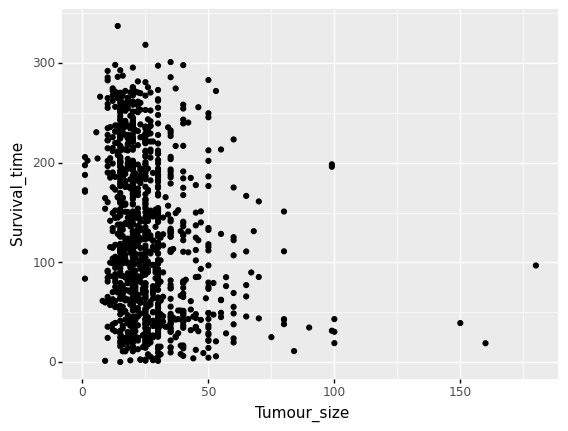

<ggplot: (8790599604321)>

In [3]:
(
p9.ggplot(metabric, p9.aes("Tumour_size", "Survival_time"))
    + p9.geom_point()
)

As with `statsmodels`, using `scikit-learn`, we can run simple linear regression using [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

There are three steps to completing this analysis:
1. **Instantiate** the model: create an object that holds the model specification.
2. **Fit** the model: fit the specified model to the data using the `.fit` function.
3. **Display** the results: use the `X` method of the fitted model to return a detailed breakdown of the model characteristics.

In [4]:
import sklearn.linear_model as linear
import numpy as np

In [5]:
# Instantiate the model
model = linear.LinearRegression()

# Define the predictor ('X') and the response ('y').
X = metabric.loc[:, ["Tumour_size"]].values
y = metabric["Survival_time"]

# Fit the model
model.fit(X, y)

# Get the predictions
X = np.linspace(0, 150, 10).reshape(-1,1) # `model.predict` expects a 2-dimensional numpy.array
y_hat = model.predict(X)

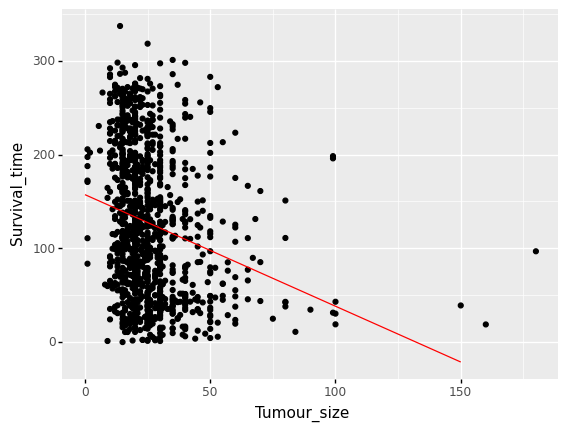

<ggplot: (8790599864805)>

In [6]:
# Display the results
predictions = pd.DataFrame({'X':X.reshape(-1), 'y_hat': y_hat}) # plotnine works with pd.DataFrame
(
p9.ggplot(metabric, p9.aes("Tumour_size", "Survival_time"))
    + p9.geom_point()
    + p9.geom_line(p9.aes(x='X', y='y_hat'), data=predictions, color='red') # Overlay the regression line on the scatter plot
)

### Multivariate linear regression with sklearn

As with statsmodels, we can apply a similar procedure to run the multivariate regression too. This time, however, we need to a little more work with the categorical variables. We'll first do that work using `pandas`, then demonstrate how to use `sklearn` to achieve the same result that will generalise to more complex examples.

We cannot use `linear.LinearRegression` directly because, unlike `statsmodels`, `sklearn` doesn't automatically treat the `str` types in `Cancer_type` ande `ER_status` columns.

First, we convert the `ER_status` to `0.0`s and `1.0`s (i.e. we 'binarize' the variable).

In [7]:
metabric['ER_status_binary'] = (metabric.ER_status == 'Positive').astype(np.float)

Next, let's 'one-hot-encode' the `Cancer_type`. This is a transformation of a single column of categorical features into an array of binary features, one-per-category, where each row has a single `1.0` ('one-hot') in the column corresponding to the matching category. This is made clearer by example.

In [8]:
cancer_types = list(metabric.Cancer_type.unique())
cancer_types

['Breast Invasive Ductal Carcinoma',
 'Breast Mixed Ductal and Lobular Carcinoma',
 'Breast Invasive Lobular Carcinoma',
 'Breast Invasive Mixed Mucinous Carcinoma',
 'Breast']

In [9]:
for cancer_type in cancer_types:
    column_name = 'Cancer_type_' + cancer_type
    metabric[column_name] = (metabric.Cancer_type == cancer_type).astype(np.float)

In [10]:
# Define the predictors ('X') and the response ('y')
X = metabric.loc[:, [
    "ER_status_binary",
    "Cancer_type_Breast Invasive Ductal Carcinoma",
    "Cancer_type_Breast Mixed Ductal and Lobular Carcinoma",
    "Cancer_type_Breast Invasive Lobular Carcinoma",
    "Cancer_type_Breast Invasive Mixed Mucinous Carcinoma",
    "Cancer_type_Breast",   
    "Tumour_size"]]
y = metabric["Survival_time"]
X.head()

,ER_status_binary,Cancer_type_Breast Invasive Ductal Carcinoma,Cancer_type_Breast Mixed Ductal and Lobular Carcinoma,Cancer_type_Breast Invasive Lobular Carcinoma,Cancer_type_Breast Invasive Mixed Mucinous Carcinoma,Cancer_type_Breast,Tumour_size
1,1.0,1.0,0.0,0.0,0.0,0.0,10.0
4,1.0,0.0,1.0,0.0,0.0,0.0,40.0
5,1.0,1.0,0.0,0.0,0.0,0.0,31.0
8,1.0,1.0,0.0,0.0,0.0,0.0,16.0
9,1.0,0.0,0.0,1.0,0.0,0.0,28.0


Now we have a `pandas.DataFrame` that is an array of `float`s, we can use `linear.LinearRegression()`.

In [11]:
# Instantiate the model
model = linear.LinearRegression()
# Fit the pipeline
model.fit(X, y)

LinearRegression()

In [12]:
# Inspect the fit regression coefficients and intercept
model.intercept_, model.coef_

(161.80168620862426,
 array([ 13.03538225, -17.57512295,  -7.66583289,  -7.4337667 ,
         -2.07277446,  34.74749699,  -1.16952734]))

You might be thinking that's a lot of extra work compared with the `statsmodels` version. Luckily, `sklearn` has the concepts of `Transformer`s and `Pipeline`s that are built to handle this, and much more complex preprocessing.

In [13]:
X = metabric.loc[:, [
    "ER_status",
    "Cancer_type",
    "Tumour_size"]]
y = metabric["Survival_time"]

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

label_transformer = sklearn.preprocessing.OneHotEncoder(drop='if_binary')
preprocessor = ColumnTransformer(
    transformers=[
        ('labels', label_transformer, ['ER_status', 'Cancer_type']),
    ],
    remainder='passthrough'
)

NameError: name 'sklearn' is not defined

In [ ]:
preprocessor.fit_transform(X)

In [ ]:
# Instantiate the model
model = linear.LinearRegression()
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
# Fit the pipeline
pipeline.fit(X, y)

In [ ]:
# Inspect the fit regression coefficients and intercept (sanity check - let's ensure we get what we had before!)
pipeline['model'].intercept_, pipeline['model'].coef_

In [ ]:
# Display the results
y_hat = pipeline.predict(X)
predictions = pd.DataFrame({'y': y, 'y_hat': y_hat}) # plotnine works with pd.DataFrame

(
p9.ggplot(predictions, p9.aes('y', 'y_hat'))
    + p9.geom_point()
    + p9.scales.xlim(0, 300)
    + p9.scales.ylim(0, 300)
) # plotnine will emit a `PlotnineWarning` indicating that we have cropped some points from our plot

As with any regression model, it's instructive to plot a histogram of the residuals. (TL;DR; - it's not exactly very predictive!)

In [ ]:
residuals = pd.DataFrame({'residuals': np.abs(y-y_hat)})
(
# the aes object contains only the variable that will be plotted on the x axis i.e. the one for which we want to generate a distribution
p9.ggplot(residuals, p9.aes('residuals'))
    # specify a histogram
    + p9.geom_histogram(bins=20)
)

### Moving beyond linear models

We can work on the US Census Bureau's [1985 Current Population Survey (CPS)](https://www.census.gov/programs-surveys/cps/library/publications.1985.html) to investigate how more powerful, non-linear models behave.

In [ ]:
import urllib, os # Standard library imports
from sklearn import svm, ensemble

First, download the data

In [ ]:
wages_path = '../data/wages.txt'
if not os.path.exists(wages_path):
    urllib.request.urlretrieve('http://lib.stat.cmu.edu/datasets/CPS_85_Wages', wages_path)

In [ ]:
names = [
    'EDUCATION',
    'SOUTH',
    'SEX',
    'EXPERIENCE',
    'UNION',
    'WAGE',
    'AGE',
    'RACE',
    'OCCUPATION',
    'SECTOR',
    'MARR',
]

wages = pandas.read_csv('../data/wages.txt', skiprows=27, skipfooter=6, sep='\t',
       header=None, engine='python')
wages.columns = names
wages.head()

Let's take a look

In [ ]:
(
    p9.ggplot(wages, p9.aes("EXPERIENCE", "EDUCATION"))
        + p9.geom_point(p9.aes(color='WAGE'), alpha=0.7)
)

Let's first fit a Support Vector Machine (SVM) on a single variable. Consider the effect of `EDUCATION` on wages.

In [ ]:
(
    p9.ggplot(wages, p9.aes("EDUCATION", "WAGE"))
        + p9.geom_point(shape='+', alpha=0.4)
)

Experimenting with different models (SVM with linear and radial basis function (rbf) kernels, and a RandomForestRegressor).

In [ ]:
# model = svm.SVR(kernel='linear')
# model = svm.SVR(kernel='rbf', C=10)
model = ensemble.RandomForestRegressor()
model.fit(X=wages.loc[:,['EXPERIENCE']], y=wages['WAGE'])

In [ ]:
X = np.linspace(0,20,100).reshape(-1,1)
y_hat = model.predict(X)

In [ ]:
predictions = pd.DataFrame({'X': X.reshape(-1), 'y_hat': y_hat}) 
(
    p9.ggplot(wages, p9.aes("EDUCATION", "WAGE"))
        + p9.geom_point(shape='+', alpha=0.4)
        + p9.geom_line(p9.aes(x='X', y='y_hat'), data=predictions, color='red')
)

The fundamental question in machine learning is, 'how wiggly do I make my line?'. One way to assess this is to use a 'holdout' set. We fit the model on some proportion of the available data, and 'hold out' the rest to evaluate how well the model generalises to data it's never previously seen.

In [ ]:
from sklearn.model_selection import train_test_split
wages_train, wages_test = train_test_split(wages, test_size=.3)

In [ ]:
model.fit(X=wages_train.loc[:,['EXPERIENCE']], y=wages_train['WAGE'])

Let's plot the predictions based on the model derived from the training set against the predictions from the full dataset.

In [ ]:
y_hat_train = model.predict(X)
predictions_train = pd.DataFrame({'X': X.reshape(-1), 'y_hat': y_hat_train}) 
(
    p9.ggplot(wages, p9.aes("EDUCATION", "WAGE"))
        + p9.geom_point(shape='+', alpha=0.4)
        + p9.geom_line(p9.aes(x='X', y='y_hat'), data=predictions, color='red')
        + p9.geom_line(p9.aes(x='X', y='y_hat'), data=predictions_train, color='blue')
)

Now assess the model performance (coefficient of determination R^2 of the prediction) on the test set.

In [ ]:
model.score(X=wages_test.loc[:,['EXPERIENCE']], y=wages_test['WAGE'])

Since this is negative, it means that our model performance is worse than if we just predicted the mean value of `WAGE` for every sample! Compare this to the model performance if evaluated on the dataset used to train it.

In [ ]:
model.score(X=wages_train.loc[:,['EXPERIENCE']], y=wages_train['WAGE'])

This is an example of 'overfitting' the training set - the model has learned to approximate the noise in our training set, rather than learning to extrapolate or interpolate in a way that generalises to samples it has not seen before.

### Extending to multivariate models

As we did with the linear regression, we can extend the SVM and RandomForestRegressor to work with more than one predictor variable. Let's see how good our model is when we include `EXPERIENCE` alongside `EDUCATION`.

Fit our model

In [ ]:
model = ensemble.RandomForestRegressor()
model.fit(X=wages_train.loc[:,['EXPERIENCE', 'EDUCATION']], y=wages_train['WAGE'])

In [ ]:
ed_min, ed_max = wages.EDUCATION.min(), wages.EDUCATION.max()
ex_min, ex_max = wages.EXPERIENCE.min(), wages.EXPERIENCE.max()

In [ ]:
grid = np.mgrid[ex_min - 1:ex_max + 1:100j, ed_min - 1:ed_max + 1:100j]
X = grid.reshape((2, -1)).T
prediction = model.predict(X)
prediction = np.reshape(prediction, (100, 100))

Display the predictions

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 4.5))
ax = fig.add_subplot()
ax.set_ylabel('EDUCATION')
ax.set_xlabel('EXPERIENCE')
wage_min, wage_max = wages.WAGE.min(), wages.WAGE.max()
wages_plot = ax.imshow(
    np.rot90(prediction),
    vmin=wage_min,
    vmax=wage_max,
    aspect='auto',
    extent=(ex_min - 1, ex_max, ed_min -1, ed_max + 1),
    cmap=plt.cm.viridis)

fig.colorbar(wages_plot, ax=ax)

## Exercises

We will work with the built-in `sklearn.datasets` diabetes dataset.

This dataset comprises 442 diabetes patients, each with ten baseline predictors: age, sex, body mass index, average blood pressure, and six blood serum measurements. The response variable is measure of disease progression one year after baseline. (Note that it is not neccessary to transform any of these variables prior to training the model - everything is all ready to go straight into `sklearn`.)

In [ ]:
from sklearn import datasets
diabetes_dataset = datasets.load_diabetes()
predictors = pd.DataFrame(data=diabetes.data, columns=diabetes_dataset.feature_names)
response = diabetes.target

diabetes_X.head()

### Exercise 1a

Using sklearn, fit a multivariate linear regression using all 442 samples to predict the response variable. Use all 10 predictors, and also score your model using predictions on all 442 samples.

### Exercise 1b

Do a test-train split, and run _Exercise 1a_ again, this time fitting your model with the training set, and scoring it both with the test set and with the training set.

### Exercise 1c

As with Exercise 1b, but this time try using the SVM ('linear' and 'rbf') and RandomForestRegressor instead. How do your results compare? Try just using one or two predictors 

### Exercise 1d (more technical)

If you're feeling so inclined, dive into the documentation of [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) and try tweaking some of the _hyperparameters_ to see how this affects your model score on the training and test datasets ('n_estimators' and 'max_depth' are good places to start). If you want do delve deeper this [blog post](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74) is a nice introduction to the concepts of _cross-validation_ and _hyperparameter tuning_ (more on this next week though!).

### Exercise 2

As a bit of pre-reading for next week, have a read through the [Kaggle Titanic](https://www.kaggle.com/c/titanic) prediction competition blurb (watch the video too). The [discussion forum](https://www.kaggle.com/c/titanic/discussion) is full of interesting beginner material too.

## Additional material

### Titanic

https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv

https://www.openml.org/d/40945

https://www.openml.org/data/get_csv/16826755/phpMYEkMl

http://bit.ly/1juuXIr 
    